# Daten laden

## Peeringdb Daten laden

In [1]:
import json
from pathlib import Path
import pandas as pd

filepath = Path('../../preprocessing/data/peeringdb/peeringdb_2_dump_2025_10_21.json')

with filepath.open('r', encoding='utf-8') as f:
    dump = json.load(f)

# extract the net.data section and load into a DataFrame
net_data = dump.get('net', {}).get('data')
if net_data is None:
    raise KeyError("JSON does not contain 'net' -> 'data' structure")

net_df = pd.DataFrame(net_data)
net_df['asn'] = net_df['asn'].astype(int)
net_df = net_df[net_df['info_type'] != '']

# show a quick preview
net_df.head()

,id,org_id,name,aka,name_long,website,social_media,asn,looking_glass,route_server,...,policy_ratio,policy_contracts,allow_ixp_update,status_dashboard,rir_status,rir_status_updated,logo,created,updated,status
0,1,8897,GTT Communications (AS4436),Formerly known as nLayer Communications,,http://www.gtt.net,"[{'service': 'website', 'identifier': 'http://...",4436,,,...,True,Required,False,None,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2022-07-27T05:33:22Z,ok
1,2,14,Akamai Technologies,,,https://www.akamai.com/,"[{'service': 'website', 'identifier': 'https:/...",20940,,,...,False,Not Required,False,https://www.akamaistatus.com/,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2025-10-20T12:16:12Z,ok
2,3,17,DALnet IRC Network,,,http://www.dal.net,"[{'service': 'website', 'identifier': 'http://...",31800,,,...,False,Not Required,False,,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2025-01-09T13:42:07Z,ok
3,5,9350,Swisscom,IP-Plus,,http://www.swisscom.com,"[{'service': 'website', 'identifier': 'http://...",3303,,telnet://route-server.ip-plus.net,...,True,Required,False,,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2025-08-12T06:33:30Z,ok
4,6,23,Cox Communications,Cox Communications,,http://www.cox.com/peering,"[{'service': 'website', 'identifier': 'http://...",22773,,,...,False,Required,False,,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2022-11-28T22:55:17Z,ok


## AS Rank laden

In [2]:
as_rank_df = pd.read_csv('../../preprocessing/data/asrank/as_rank_df.csv')
as_rank_df.head()

,asn,rank,asnDegree_total,asnDegree_customer,asnDegree_peer,asnDegree_provider,cone_numberAsns,cone_numberPrefixes,cone_numberAddresses
0,3356,1,6613,6545,68,0,53986,873410,3468642119
1,1299,2,2567,2509,58,0,41193,776707,3219679484
2,174,3,6723,6626,97,0,38887,730166,3034352967
3,3257,4,1853,1816,37,0,36040,612491,2791999209
4,2914,5,1541,1483,58,0,25179,576134,2918763154


## Daten Mergen

In [4]:
merged_df = pd.merge(net_df, as_rank_df, left_on='asn', right_on='asn', how='left')
merged_df.head()

,id,org_id,name,aka,name_long,website,social_media,asn,looking_glass,route_server,...,updated,status,rank,asnDegree_total,asnDegree_customer,asnDegree_peer,asnDegree_provider,cone_numberAsns,cone_numberPrefixes,cone_numberAddresses
0,1,8897,GTT Communications (AS4436),Formerly known as nLayer Communications,,http://www.gtt.net,"[{'service': 'website', 'identifier': 'http://...",4436,,,...,2022-07-27T05:33:22Z,ok,78320.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,14,Akamai Technologies,,,https://www.akamai.com/,"[{'service': 'website', 'identifier': 'https:/...",20940,,,...,2025-10-20T12:16:12Z,ok,1894.0,485.0,14.0,366.0,105.0,15.0,8945.0,14612752.0
2,3,17,DALnet IRC Network,,,http://www.dal.net,"[{'service': 'website', 'identifier': 'http://...",31800,,,...,2025-01-09T13:42:07Z,ok,47745.0,78.0,0.0,74.0,4.0,1.0,2.0,512.0
3,5,9350,Swisscom,IP-Plus,,http://www.swisscom.com,"[{'service': 'website', 'identifier': 'http://...",3303,,telnet://route-server.ip-plus.net,...,2025-08-12T06:33:30Z,ok,81.0,1273.0,166.0,1101.0,6.0,733.0,22131.0,42899794.0
4,6,23,Cox Communications,Cox Communications,,http://www.cox.com/peering,"[{'service': 'website', 'identifier': 'http://...",22773,,,...,2022-11-28T22:55:17Z,ok,110.0,499.0,489.0,8.0,2.0,505.0,11982.0,31992440.0


In [ ]:
category_map = {
    "NSP": "Transit",
    "Content": "Content",
    "Cable/DSL/ISP": "Access",
    "Enterprise": "Enterprise",
    "Educational/Research": "Education/Research",
    "Non-Profit": "Enterprise",
    "Government": "Enterprise",
    "Route Server": "Network Services",
    "Route Collector": "Network Services",
    "Network Services": "Network Services",
    "Not-Disclosed": "Unknown"
}

merged_df["info_type"] = (
    merged_df["info_type"]
    .map(category_map)
    .fillna(merged_df["info_type"])
)
merged_df["info_type"].value_counts()

# Evaluation

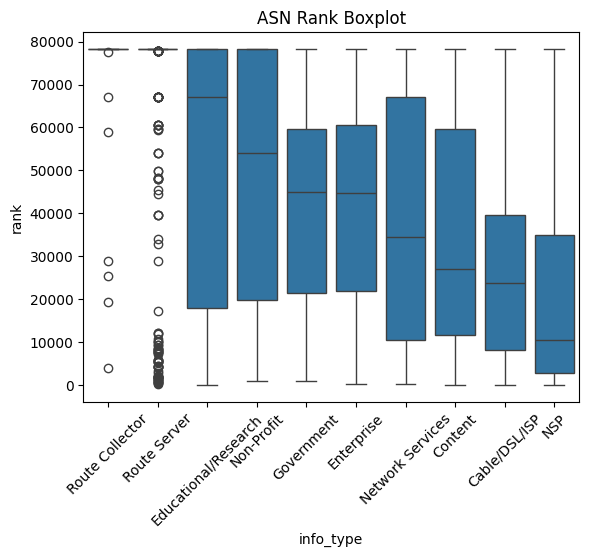

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
order = merged_df.groupby('info_type')['rank'].median().sort_values(ascending=False).index
sns.boxplot(data=merged_df, x='info_type', y='rank', order=order)
plt.xticks(rotation=45)
plt.title('ASN Rank Boxplot')
plt.show()


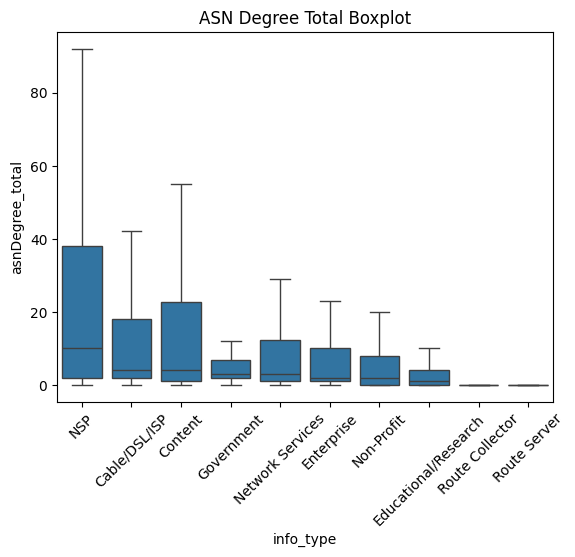

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
order = merged_df.groupby('info_type')['asnDegree_total'].median().sort_values(ascending=False).index
sns.boxplot(data=merged_df, x='info_type', y='asnDegree_total', order=order, showfliers=False)
plt.xticks(rotation=45)
plt.title('ASN Degree Total Boxplot')
plt.show()


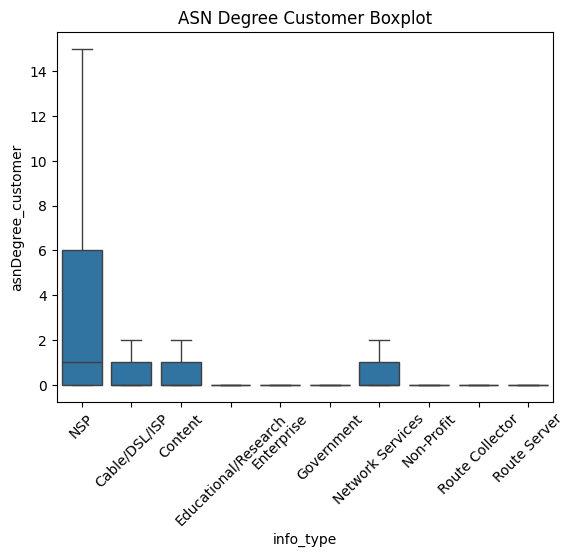

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
order = merged_df.groupby('info_type')['asnDegree_customer'].median().sort_values(ascending=False).index
sns.boxplot(data=merged_df, x='info_type', y='asnDegree_customer', order=order, showfliers=False)
plt.xticks(rotation=45)
plt.title('ASN Degree Customer Boxplot')
plt.show()


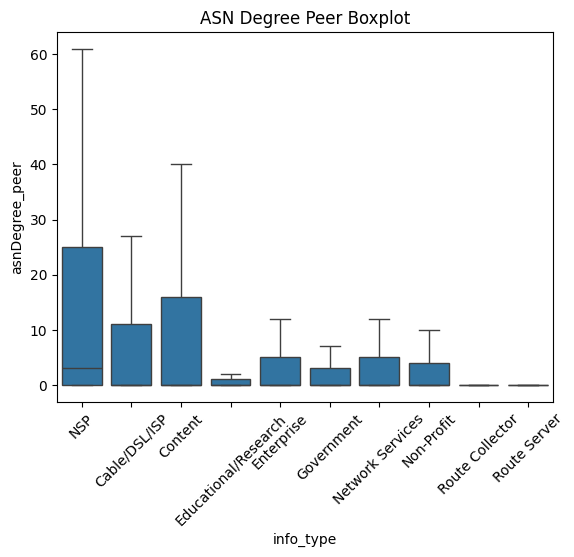

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
order = merged_df.groupby('info_type')['asnDegree_peer'].median().sort_values(ascending=False).index
sns.boxplot(data=merged_df, x='info_type', y='asnDegree_peer', order=order, showfliers=False)
plt.xticks(rotation=45)
plt.title('ASN Degree Peer Boxplot')
plt.show()


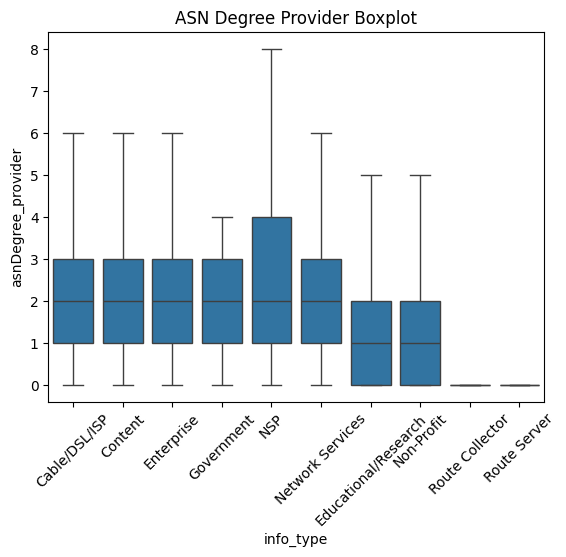

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
order = merged_df.groupby('info_type')['asnDegree_provider'].median().sort_values(ascending=False).index
sns.boxplot(data=merged_df, x='info_type', y='asnDegree_provider', order=order, showfliers=False)
plt.xticks(rotation=45)
plt.title('ASN Degree Provider Boxplot')
plt.show()


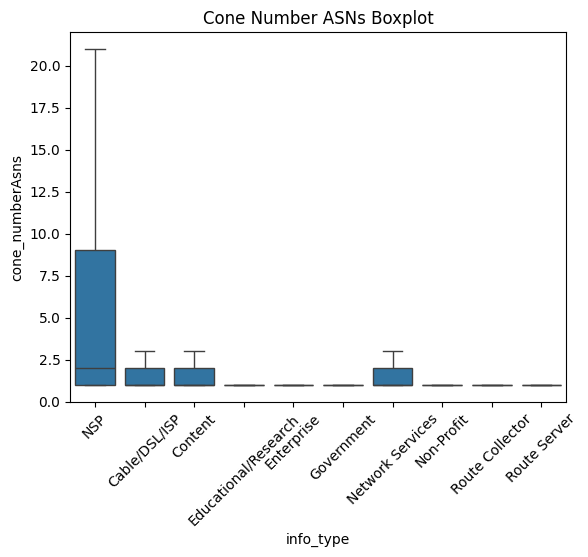

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
order = merged_df.groupby('info_type')['cone_numberAsns'].median().sort_values(ascending=False).index
sns.boxplot(data=merged_df, x='info_type', y='cone_numberAsns', order=order, showfliers=False)
plt.xticks(rotation=45)
plt.title('Cone Number ASNs Boxplot')
plt.show()


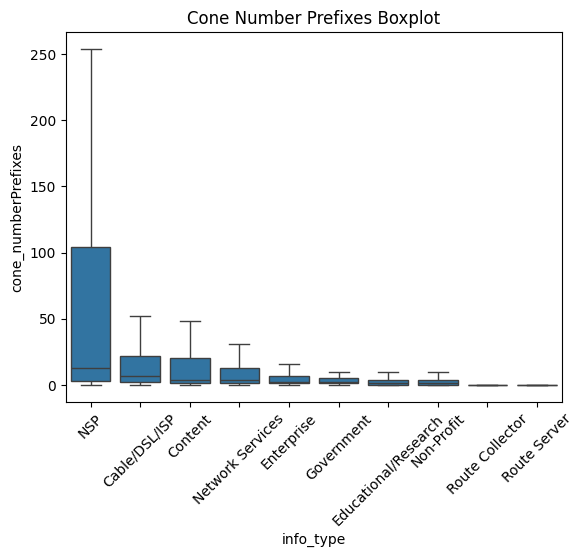

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
order = merged_df.groupby('info_type')['cone_numberPrefixes'].median().sort_values(ascending=False).index
sns.boxplot(data=merged_df, x='info_type', y='cone_numberPrefixes', order=order, showfliers=False)
plt.xticks(rotation=45)
plt.title('Cone Number Prefixes Boxplot')
plt.show()


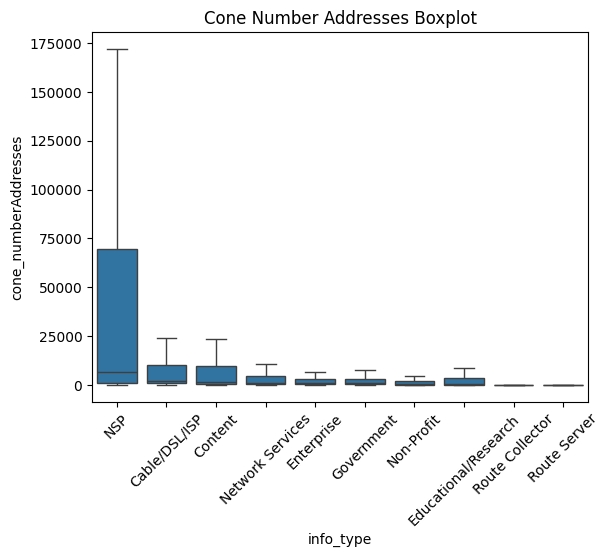

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
order = merged_df.groupby('info_type')['cone_numberAddresses'].median().sort_values(ascending=False).index
sns.boxplot(data=merged_df, x='info_type', y='cone_numberAddresses', order=order, showfliers=False)
plt.xticks(rotation=45)
plt.title('Cone Number Addresses Boxplot')
plt.show()
